In [4]:
#Importing Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
df['Species'].nunique()

7

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

# Skimming through the datasets

In [12]:
df.shape

(159, 7)

In [13]:
#checking for missing data
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There is no missing value in the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


We can see that all features except species in the dataset are numeric type float.

Species is only categorical variable in the dataframe.

In [15]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

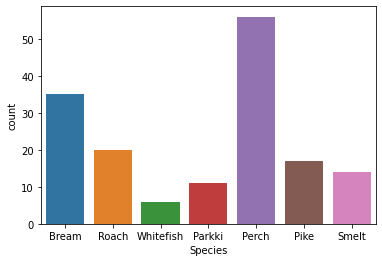

In [16]:
sns.countplot(data = df, x = 'Species')

Perch species of fish has the has highest value count whereas for Whitefish the data might be insufficient

# Finding variables which are useful for prediction

In [17]:
corr=df.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

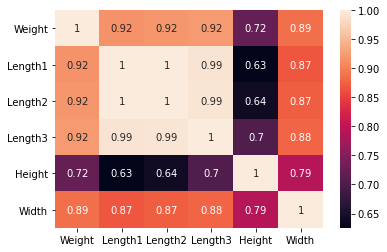

In [18]:
plt.figure()
sns.heatmap(data=df.corr(),annot=True)

The Big colorful picture above which is called Heatmap helps us to understand how features are correlated to each other.

Postive sign implies postive correlation between two features whereas Negative sign implies negative correlation between two features.

I am here interested to know which features have good correlation with our dependent variable weight and can help in having good predictions.

I observed that all features show some good correaltion with weight

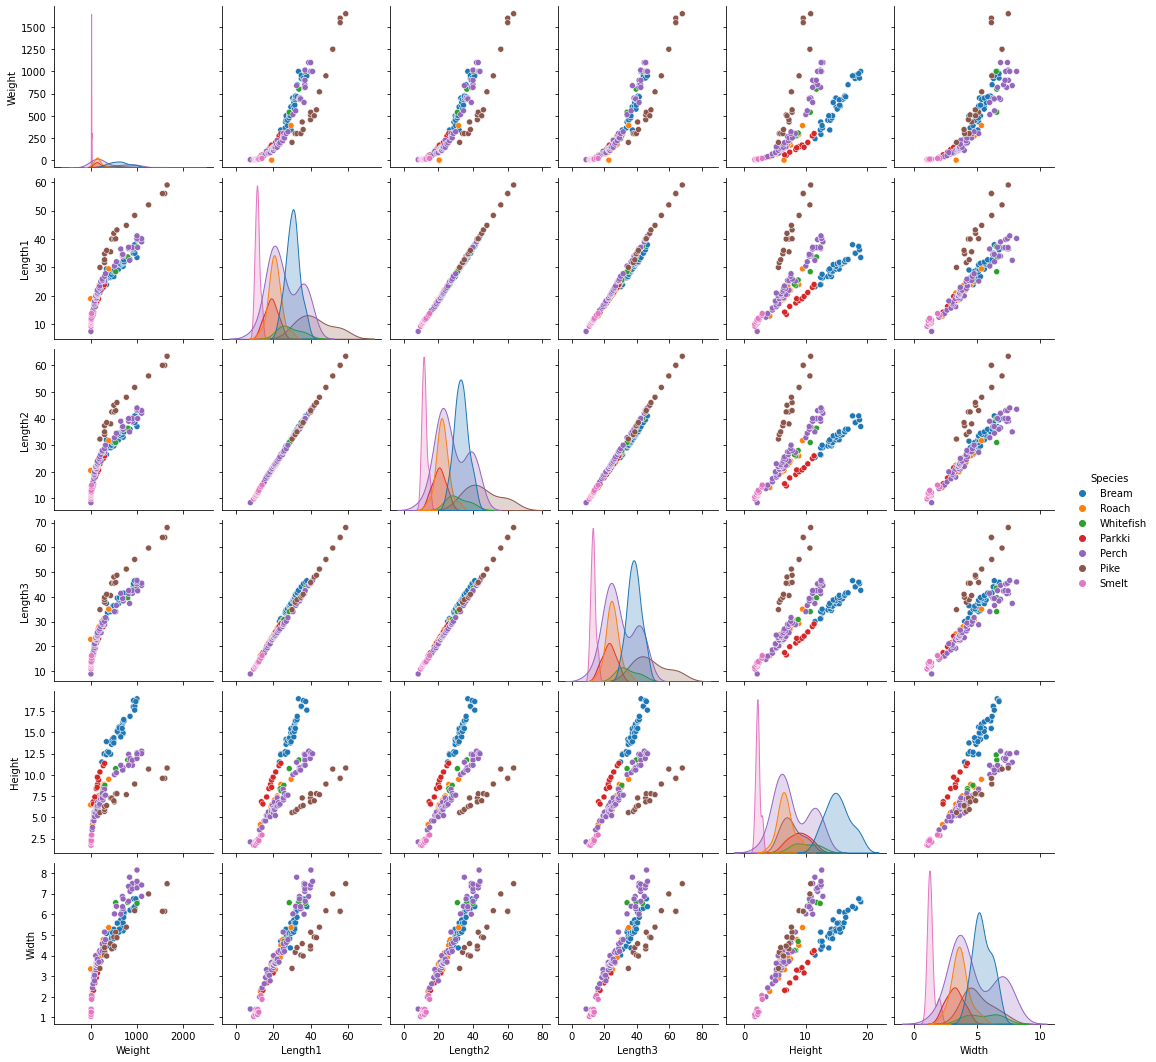

In [19]:
sns.pairplot(df[["Weight", "Length1", "Length2", 
                 "Length3", "Height", "Width",'Species']], diag_kind ="kde", hue='Species')

 Observations

The dependent variable-'weight' has linear relationship with all other variables.

Width and Height are quite normally distributed

There seems to have presence of some outliers in the dataset.

In [20]:
df.describe().round(2)

,Weight,Length1,Length2,Length3,Height,Width
count,159.00,159.00,159.00,159.00,159.00,159.00
mean,398.33,26.25,28.42,31.23,8.97,4.42
std,357.98,10.00,10.72,11.61,4.29,1.69
min,0.00,7.50,8.40,8.80,1.73,1.05
25%,120.00,19.05,21.00,23.15,5.94,3.39
50%,273.00,25.20,27.30,29.40,7.79,4.25
75%,650.00,32.70,35.50,39.65,12.37,5.58
max,1650.00,59.00,63.40,68.00,18.96,8.14


Above table displays measures of central tendency like Mean, Median (50%) etc. We can see number of entries for each variable which is same as 159.

Observations

Maximum value in weight is much higher than 75% of data points

We will study each of the feature seprately and see how data is distributed and if there are any outliers or not.


# Univariate Analysis

# Weight

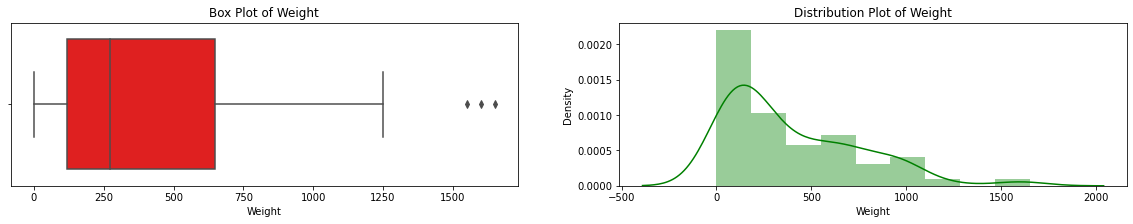

In [24]:
#Box Plot and Distribution Plot for Dependent variable weight
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Weight,color='red')
plt.title('Box Plot of Weight')

plt.subplot(1,2,2)
sns.distplot(a=df.Weight,color='green')
plt.title('Distribution Plot of Weight')
plt.show()

From above two figures we can see observe that:

Weight is normally distributed

It contains some extreme values which could be potential outliers

# Removing outliers

In [25]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ",IQR)
upper_limit = Q3 +(1.5*IQR)
print("upper_limit: ",upper_limit)
outliers = df['Weight'][(df['Weight'] >upper_limit)]
outliers

IQR:  530.0
upper_limit:  1445.0


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [26]:
df = df.drop([142,143,144], axis=0)

# Length1

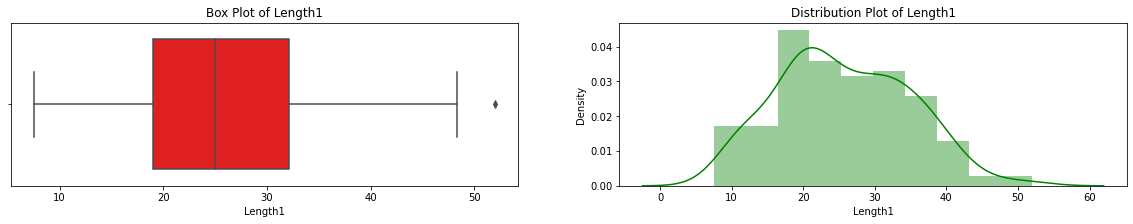

In [27]:
#Box Plot and Distribution Plot for Dependent variable weight
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Length1,color='red')
plt.title('Box Plot of Length1')

plt.subplot(1,2,2)
sns.distplot(a=df.Length1,color='green')
plt.title('Distribution Plot of Length1')
plt.show()

From above two figures we can see observe that:

Weight is normally distributed

It contains some extreme values which could be potential outliers

# Removing outliers

In [30]:
Q1 = df['Length1'].quantile(0.25)
Q3 = df['Length1'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ",IQR)
upper_limit = Q3 +(1.5*IQR)
print("upper_limit: ",upper_limit)
outliers = df['Length1'][(df['Length1'] >upper_limit)]
outliers

IQR:  13.125
upper_limit:  51.8125


141    52.0
Name: Length1, dtype: float64

In [31]:
df = df.drop([141], axis=0)

# Length2

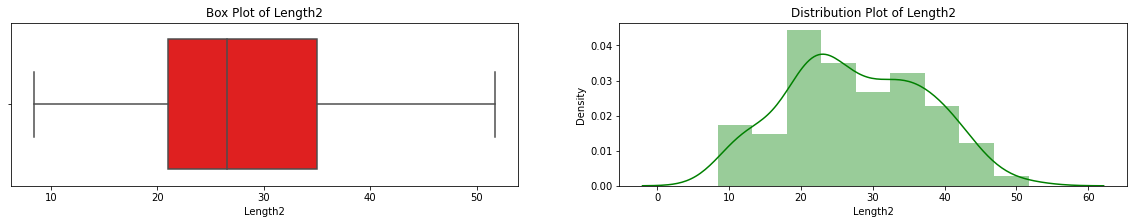

In [32]:
#Box Plot and Distribution Plot for Dependent variable weight
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Length2,color='red')
plt.title('Box Plot of Length2')

plt.subplot(1,2,2)
sns.distplot(a=df.Length2,color='green')
plt.title('Distribution Plot of Length2')
plt.show()

# Length 3

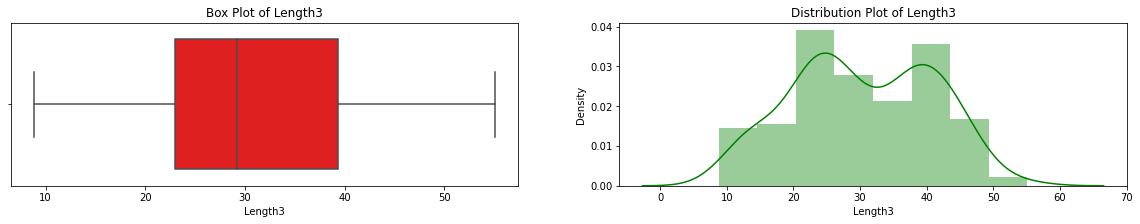

In [33]:
#Box Plot and Distribution Plot for Dependent variable weight
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Length3,color='red')
plt.title('Box Plot of Length3')

plt.subplot(1,2,2)
sns.distplot(a=df.Length3,color='green')
plt.title('Distribution Plot of Length3')
plt.show()

# Height

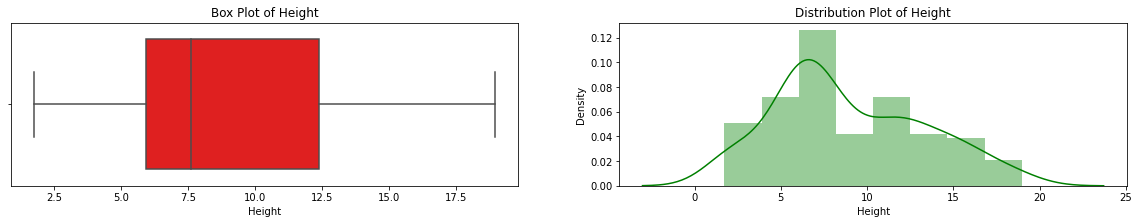

In [34]:
#Box Plot and Distribution Plot for Dependent variable weight
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Height,color='red')
plt.title('Box Plot of Height')

plt.subplot(1,2,2)
sns.distplot(a=df.Height,color='green')
plt.title('Distribution Plot of Height')
plt.show()

# Width

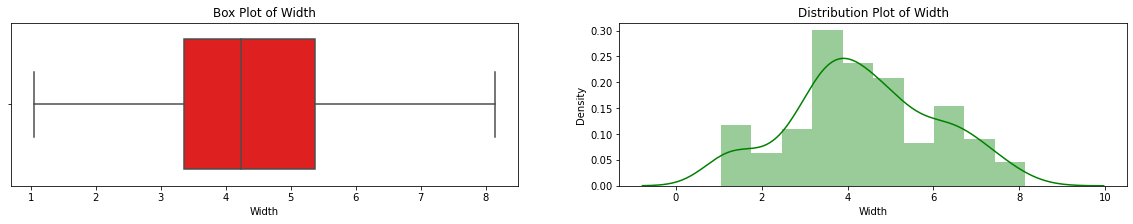

In [35]:
#Box Plot and Distribution Plot for Dependent variable weight
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Width,color='red')
plt.title('Box Plot of Width')

plt.subplot(1,2,2)
sns.distplot(a=df.Width,color='green')
plt.title('Distribution Plot of Width')
plt.show()

In [36]:
df.describe().round(2)

,Weight,Length1,Length2,Length3,Height,Width
count,155.00,155.00,155.00,155.00,155.00,155.00
mean,369.57,25.49,27.60,30.38,8.94,4.36
std,312.69,8.90,9.56,10.47,4.34,1.66
min,0.00,7.50,8.40,8.80,1.73,1.05
25%,120.00,19.00,21.00,22.95,5.93,3.36
50%,270.00,25.00,26.50,29.20,7.62,4.24
75%,605.00,32.00,35.00,39.35,12.38,5.37
max,1100.00,48.30,51.70,55.10,18.96,8.14


# Converting categorical data

In [37]:
df_dummy = pd.get_dummies(df, columns=["Species"])
print(df_dummy.shape)
df_dummy.head()

(155, 13)


,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


# Splitting Dataset into Train and Test Set

In [38]:
#Now will split our dataset into Dependent variable and Independent variable
# Dependant (Target) Variable:
y = df_dummy['Weight']
# Independant Variables:
x = df_dummy.iloc[:,1:13]

x[:5]

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


First, we have divided our data into two sets:

X contains all independent variables

y contains dependent variable weight

In [39]:
print(f"Shape of Dependent Variable y = {y.shape}")
print(f"Shape of Independent Variable X = {x.shape}")

Shape of Dependent Variable y = (155,)
Shape of Independent Variable X = (155, 12)


# Linear Regression

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (124, 12)
Shape of X_test = (31, 12)
Shape of y_train = (124,)
Shape of y_test = (31,)


In [41]:
lin_reg_mod = linear_model.LinearRegression() 
lin_reg_mod.fit(X_train, y_train)

LinearRegression()

In [43]:
import numpy as np
pred = lin_reg_mod.predict(X_test) #Make Prediction for test (unseen) data
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred))) #Create metrics for accuracy
test_set_r2 = r2_score(y_test, pred)
print("RMSE value:",test_set_rmse)
print("R^2 value: ",test_set_r2)

RMSE value: 61.29762120650106
R^2 value:  0.9413410157765452


We know, the higher the R-squared value, the more accurately the regression equation models your data

ALso, RMSE measures how accurately the model predicts the response, hence it's an important criterion for fit if the main purpose of the model is prediction.

This is a good regression model as the R square score is near 1.0, and the RMSE error is not very large.

<AxesSubplot:xlabel='Weight'>

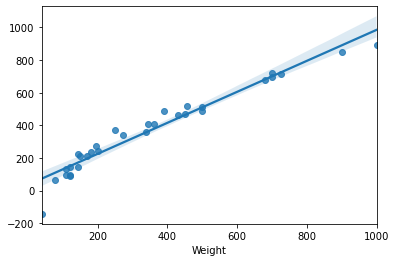

In [44]:
plt.figure()
sns.regplot(y_test,pred)

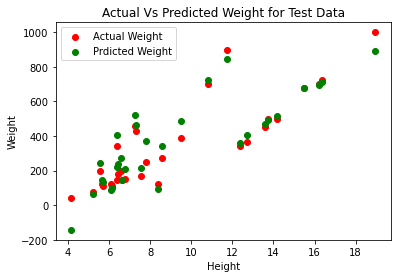

In [45]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Height'], lin_reg_mod.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

# 40% - 60% split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state = 2)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (93, 12)
Shape of X_test = (62, 12)
Shape of y_train = (93,)
Shape of y_test = (62,)


In [47]:

lin_reg_mod2 = linear_model.LinearRegression() 
lin_reg_mod2.fit(X_train, y_train)

LinearRegression()

In [48]:
pred = lin_reg_mod2.predict(X_test) #Make Prediction for test (unseen) data
test_set_rmse_2 = (np.sqrt(mean_squared_error(y_test, pred))) #Create metrics for accuracy
test_set_r2_2 = r2_score(y_test, pred)
print("RMSE value:",test_set_rmse_2)
print("R^2 value: ",test_set_r2_2)

RMSE value: 73.98513485566578
R^2 value:  0.9176740926281823


<AxesSubplot:xlabel='Weight'>

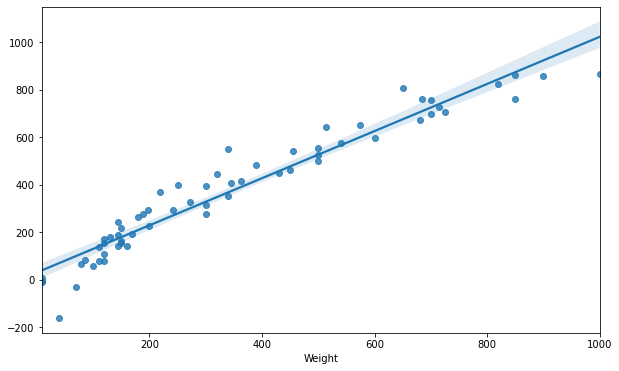

In [49]:
plt.figure()
sns.regplot(y_test,pred)

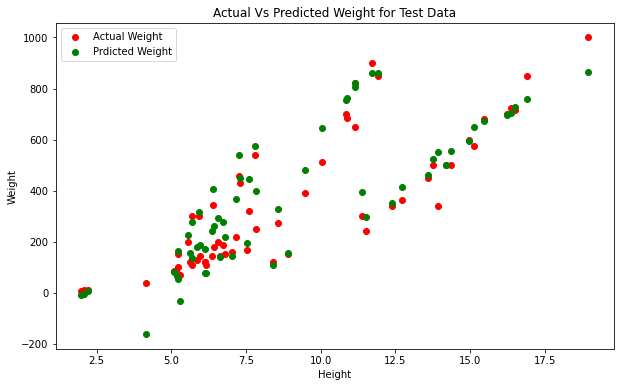

In [50]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Height'], lin_reg_mod2.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

# CONCLUSION:

In this experiment we observe that when the dataset is split in 80:20 ratio, 
the models give better results than when it is split in 60:40 ratio to train the model on the Machine Learning Algorithm